<a href="https://colab.research.google.com/github/Vonnabe/supervisedMLinAgeAndHeight/blob/main/personML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Get Data

In [1]:
!wget "https://archive.org/download/ages-and-heights/AgesAndHeights.pkl"

--2024-02-26 12:42:05--  https://archive.org/download/ages-and-heights/AgesAndHeights.pkl
Resolving archive.org (archive.org)... 207.241.224.2
Connecting to archive.org (archive.org)|207.241.224.2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ia601802.us.archive.org/31/items/ages-and-heights/AgesAndHeights.pkl [following]
--2024-02-26 12:42:05--  https://ia601802.us.archive.org/31/items/ages-and-heights/AgesAndHeights.pkl
Resolving ia601802.us.archive.org (ia601802.us.archive.org)... 207.241.227.72
Connecting to ia601802.us.archive.org (ia601802.us.archive.org)|207.241.227.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2406 (2.3K) [application/octet-stream]
Saving to: ‘AgesAndHeights.pkl’

AgesAndHeights.pkl  100%[===================>]   2.35K  --.-KB/s    in 0s      

2024-02-26 12:42:06 (456 MB/s) - ‘AgesAndHeights.pkl’ saved [2406/2406]



In [4]:
import pandas as pd
raw_data = pd.read_pickle('AgesAndHeights.pkl')
raw_data

,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414
...,...,...
95,7.323712,46.857505
96,5.591509,39.339990
97,2.625606,32.918925
98,5.519293,40.704154


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>]], dtype=object)

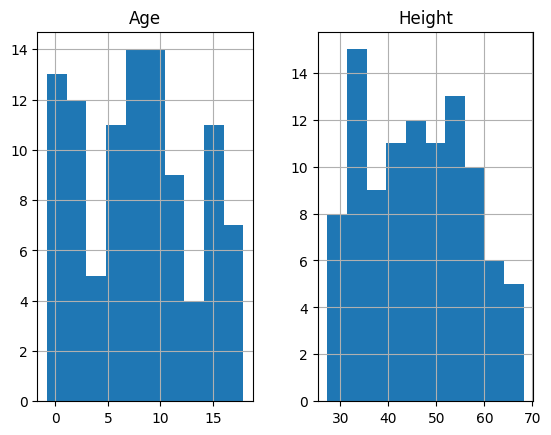

In [5]:
raw_data.hist()

In [6]:
raw_data.describe()

,Age,Height
count,100.000000,100.000000
mean,7.966138,45.955674
std,5.321621,10.787318
min,-0.780853,27.332513
25%,3.048885,36.320107
50%,7.795597,46.178251
75%,11.464331,53.994166
max,17.887852,68.170414


Data Cleaning

In [11]:
cleaned_data = raw_data[raw_data['Age'] > 0]
cleaned_data

,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414
...,...,...
95,7.323712,46.857505
96,5.591509,39.339990
97,2.625606,32.918925
98,5.519293,40.704154


In [12]:
cleaned_data.describe()

,Age,Height
count,93.000000,93.000000
mean,8.595192,47.164420
std,4.975428,10.190036
min,0.195686,29.007696
25%,5.020210,38.287710
50%,8.433330,47.332750
75%,11.923862,54.751892
max,17.887852,68.170414


Visualize Cleaned Data

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>]], dtype=object)

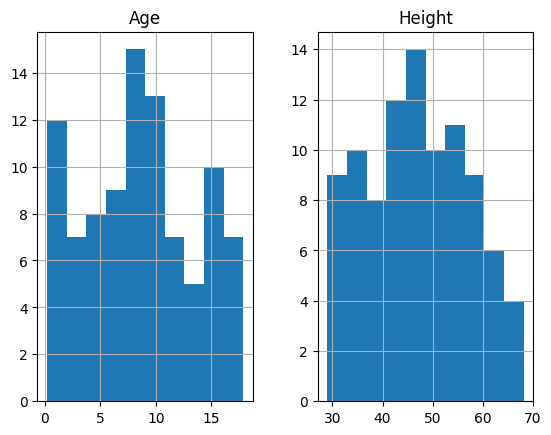

In [13]:
cleaned_data.hist()

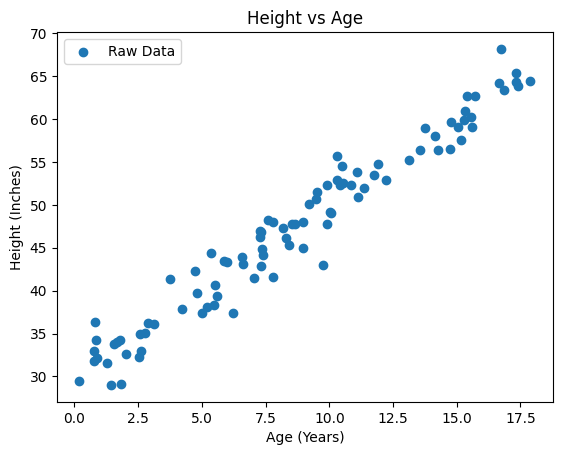

In [17]:
import matplotlib.pyplot as plt

ages = cleaned_data['Age']
heights = cleaned_data['Height']

plt.scatter(ages, heights, label='Raw Data')
plt.title('Height vs Age')
plt.xlabel('Age (Years)')
plt.ylabel('Height (Inches)')

plt.legend()

Build Model and Train

In [ ]:
y = alpha + beta * x + epsilon
y_hat = alpha + beta * x

In [18]:
parameters = {'alpha': 40, 'beta': 4}

In [20]:
def y_hat(age, params):
  alpha = params['alpha']
  beta = params['beta']
  return alpha + beta * age
y_hat(5,parameters)

60

In [28]:
def learn_parameters(data, params):
  x, y = data['Age'], data['Height']
  x_bar, y_bar = x.mean(), y.mean()
  x, y = x.to_numpy(), y.to_numpy()
  beta = sum( ((x-x_bar) * (y-y_bar)) / sum( (x-x_bar)**2 ))
  alpha = y_bar - beta * x_bar
  params['alpha'] = alpha
  params['beta'] = beta


In [29]:
new_parameters = {'alpha': 0, 'beta': 0}
learn_parameters(cleaned_data, new_parameters)
new_parameters

{'alpha': 29.96185761461583, 'beta': 2.0014168989106316}

In [33]:
spaced_ages = list(range(18))
spaced_untrained_predictions= [y_hat(x, parameters) for x in spaced_ages]
spaced_untrained_predictions

[40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88, 92, 96, 100, 104, 108]

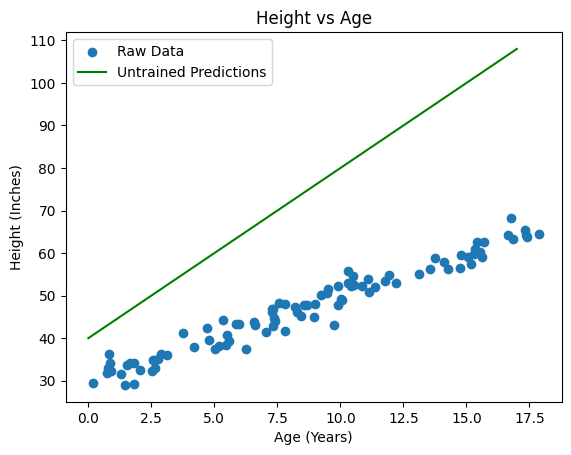

In [35]:
ages = cleaned_data['Age']
heights = cleaned_data['Height']

plt.scatter(ages, heights, label='Raw Data')
plt.plot(spaced_ages, spaced_untrained_predictions, label='Untrained Predictions', color='green')

plt.title('Height vs Age')
plt.xlabel('Age (Years)')
plt.ylabel('Height (Inches)')

plt.legend()

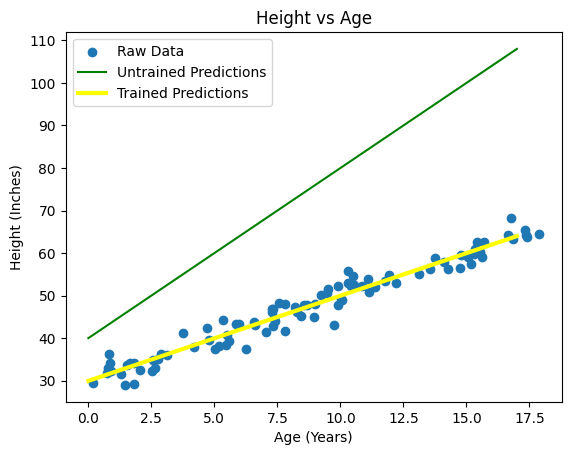

In [39]:
spaced_trained_predictions= [y_hat(x, new_parameters) for x in spaced_ages]
plt.scatter(ages, heights, label='Raw Data')
plt.plot(spaced_ages, spaced_untrained_predictions, label='Untrained Predictions', color='green')
plt.plot(spaced_ages, spaced_trained_predictions, label='Trained Predictions', color='yellow', lw=3)

plt.title('Height vs Age')
plt.xlabel('Age (Years)')
plt.ylabel('Height (Inches)')

plt.legend()

Use the Model- Make Predictions on Unseen Data

In [40]:
new_age = 5
y_hat(new_age,new_parameters)

39.96894210916899